# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_mouse_study = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
print(merged_mouse_study.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [106]:
# Checking the number of mice.
num_unique_mice = merged_mouse_study['Mouse ID'].nunique()
print(f"Number of mice in study:", num_unique_mice)

Number of mice in study: 249


In [107]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_rows = merged_mouse_study[merged_mouse_study.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_rows

duplicate_rows["Mouse ID"]

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [119]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_id = merged_mouse_study.loc[merged_mouse_study["Mouse ID"] == "g989", :]

duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [109]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_mouse_study[merged_mouse_study['Mouse ID'] != 'g989']

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [110]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].nunique()
print(f"Number of unique mice in study:", clean_mice)

Number of unique mice in study: 248


## Summary Statistics

In [123]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.


regimen_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
regimen_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
regimen_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
regimen_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = pd.DataFrame({"Mean Tumor Volume": regimen_mean, 
                                    "Median Tumor Volume":regimen_median, 
                                    "Tumor Volume Variance":regimen_variance, 
                                    "Tumor Volume Std. Dev.": regimen_std, 
                                    "Tumor Volume Std. Err.": regimen_sem})

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [124]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

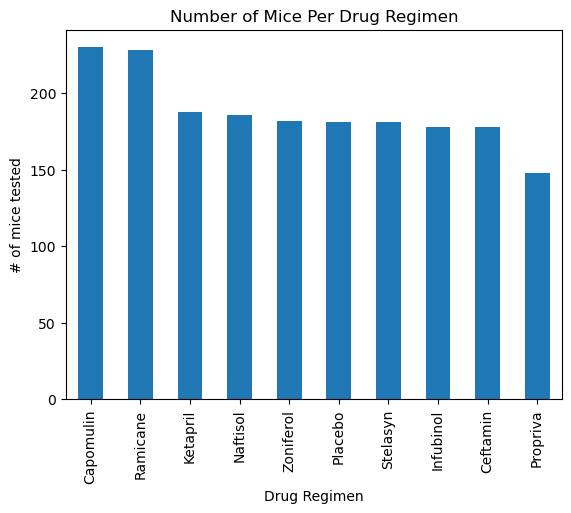

In [126]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_counts = clean_df['Drug Regimen'].value_counts()
bar_chart =mice_counts.plot.bar(color='tab:blue')

# defining axises
plt.xlabel("Drug Regimen")
plt.ylabel("# of mice tested")
plt.title("Number of Mice Per Drug Regimen")

plt.show()

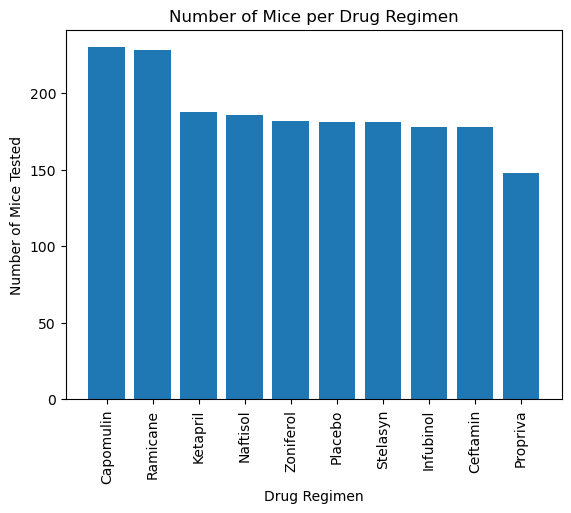

In [128]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = mice_counts.index.values
y_axis = mice_counts.values

plt.bar(x_axis, y_axis, color='tab:blue', alpha=1, align='center')

# Setting the xlabel and ylabel, title 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Number of Mice per Drug Regimen")

plt.show()

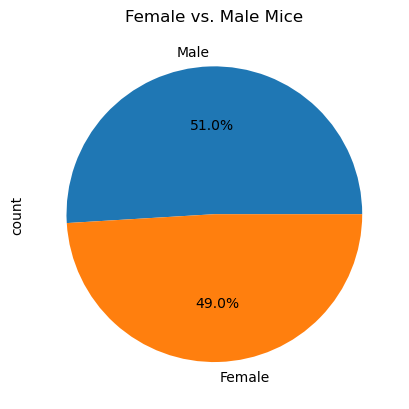

In [129]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_data = clean_df["Sex"].value_counts()
sex_data.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")

# Make the pie chart
plt.show()

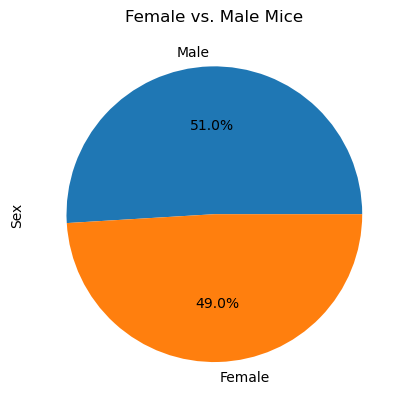

In [130]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

labels = ['Female', 'Male']
sizes = [49.8989395, 50.700902]
plot = sex_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint = clean_df.groupby(["Mouse ID"]).max()
mouse_timepoint_reset = mouse_timepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merged_data_frame = mouse_timepoint_reset[['Mouse ID','Timepoint']].\
    merge(clean_df,on=['Mouse ID','Timepoint'],how="left")

In [136]:
# Put treatments into a list for for loop (and later for plot labels)
def outliers(regimen):
    regimen_data = timepoint_merged_data_frame.loc[timepoint_merged_data_frame["Drug Regimen"] == regimen]['Tumor Volume (mm3)']



# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(f"{regimen}'s potential outliers:{outliers}")
    return regimen_data

cap = outliers("Capomulin")
ram = outliers("Ramicane")
inf = outliers("Infubinol")
ceft = outliers("Ceftamin")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


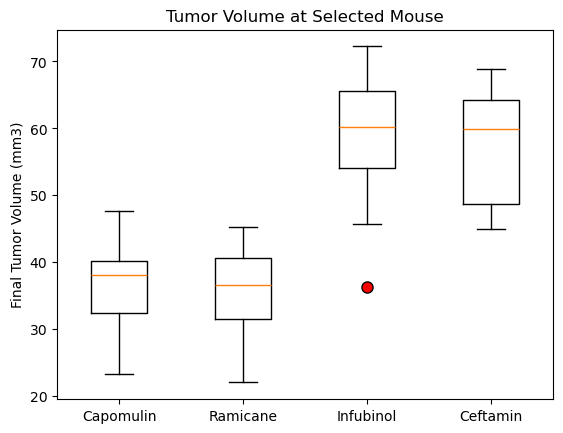

In [137]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
red_point = dict(markerfacecolor = "red", markersize=8)
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops= red_point)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Tumor Volume at Selected Mouse')


plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

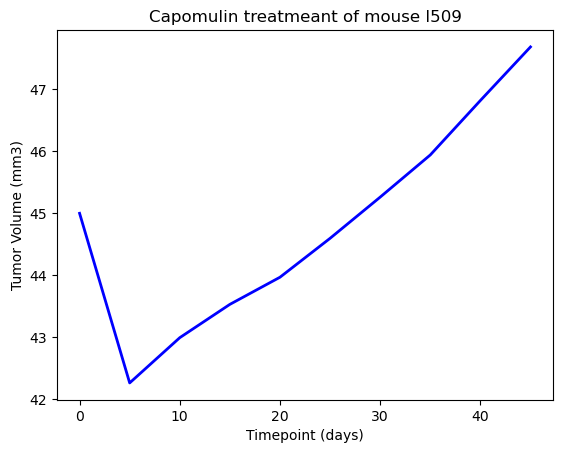

In [144]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

capomulin_mouse.head()

capmouse_df = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == "i557",:]
capmouse_df.head()
x_axis = capmouse_df["Timepoint"]
tumsiz = capmouse_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse i557')
plt.plot(x_axis, tumsiz,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

       

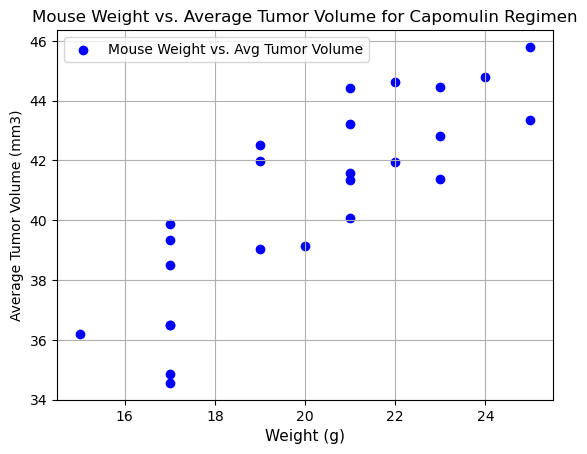

In [153]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol = capomulin_mouse.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()

# Scatter plot
marker_size = 10
plt.scatter(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.xlabel('Weight (g)', fontsize=11)
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.legend(['Mouse Weight vs. Avg Tumor Volume'], loc='best')  # Adding legend
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721


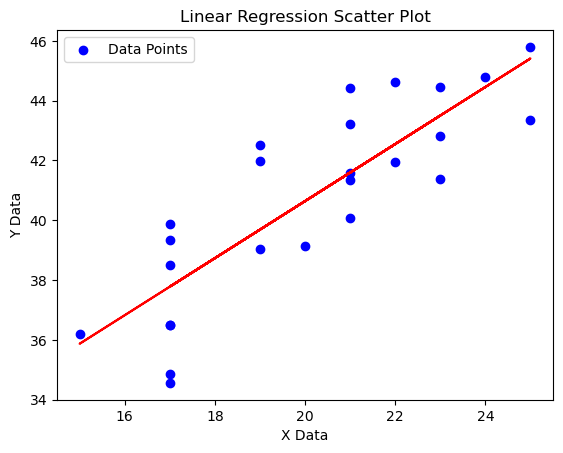

In [161]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_data = avg_capm_vol['Weight (g)']
y_data = avg_capm_vol['Tumor Volume (mm3)'] 
#create scatter plot
plt.scatter(x_data, y_data, color='blue', label='Data Points')
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.title('Linear Regression Scatter Plot')
plt.legend()

# Calculate the correlation coefficient
correlation_coefficient, p_value = st.pearsonr(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Calculate linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(avg_capm_vol['Weight (g)'], avg_capm_vol['Tumor Volume (mm3)'])

# Create regression line:

regression_line = [(slope * x) + intercept for x in x_data]

# Plot regression line
plt.plot(x_data, regression_line, color='red', label='Linear Regression')

plt.show()